Name: Sai Deepika Sunkesula

# Task 2: Prediction using Unsupervised ML

### Import required libraries and read Iris dataset

In [2]:
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
import math
from matplotlib import pyplot as plt

# Read Iris dataset from csv file.
iris_dataset = datasets.load_iris()
iris_dataset_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualize the ground-truth clustering from actual species labels

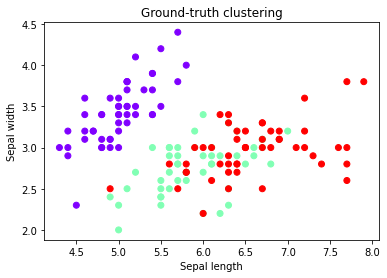

In [ ]:
plt.scatter(iris_dataset_df.iloc[:, 0].values,
            iris_dataset_df.iloc[:, 1].values,
            c=iris_dataset.target, cmap='rainbow')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Ground-truth clustering")
plt.show()

### Record WCSS while varying the number of clusters for K-Means algorithm

In [ ]:
num_clusters_set = range(1, 10)

# Keep changing number of clusters, and use K-Means to fit the dataset.
# Record sum of squared distance of points to cluster centroids for
# generating elbow graph.
elbow_scores = []
for k in num_clusters_set:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris_dataset_df)

  # Populate data for elbow curve
  elbow_scores.append(kmeans.inertia_)

### Visualize the elbow curve and identify optimal number of clusters

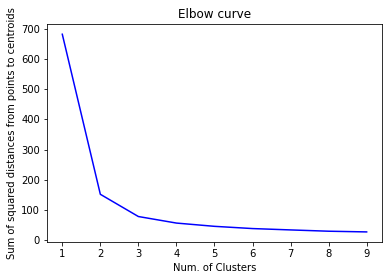

In [ ]:
# Plot the elbow curve.
plt.plot(num_clusters_set, elbow_scores, color="blue")
plt.xlabel("Num. of Clusters")
plt.ylabel("Sum of squared distances from points to centroids")
plt.title("Elbow curve")
plt.show()

From Elbow curve, the elbow occurs for K = 3. Therefore the optimal number of clusters is 3;

### Visualizing the K-Means clustering for 3 clusters 

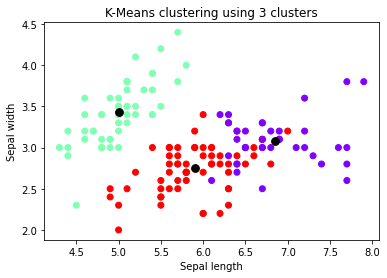

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_dataset_df)

clusters = kmeans.predict(iris_dataset_df)

# Now plot a 2D scatter plot for the dataset using first two columns.
plt.scatter(iris_dataset_df.iloc[:, 0].values,
            iris_dataset_df.iloc[:, 1].values,
            c=kmeans.labels_,
            cmap='rainbow')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("K-Means clustering using 3 clusters")

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', s=60)
plt.show()